# Feature correlation

In this example, we show how to use {func}`moscot.problems.time.TemporalProblem.compute_feature_correlation`.

## Preliminaries

In [8]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import moscot.plotting as mtp
from moscot import datasets
from moscot.problems.spatiotemporal import SpatioTemporalProblem

Load the {func}`~moscot.datasets.mosta` dataset.

In [2]:
adata = datasets.mosta()
adata = adata[(adata.obs["timepoint"] == "E9.5") | (adata.obs["timepoint"] == "E10.5")]
adata.obs["timepoint"] = (
    adata.obs["timepoint"].str[1:].astype("float").astype("category")
)
adata

C:\Users\adwol\AppData\Local\Temp\ipykernel_1200\1652703364.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["timepoint"] = (


AnnData object with n_obs × n_vars = 24162 × 2000
    obs: 'annotation', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'time', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'Heart_mapping', 'Heart_annotation'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'mt', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Heart_annotation_colors', 'annotation_colors', 'hvg', 'moscot_results'
    obsm: 'spatial'
    layers: 'count'

Create and solve the {class}`~moscot.problems.spatiotemporal.SpatioTemporalProblem`.

In [3]:
stp = (
    SpatioTemporalProblem(adata)
    .prepare(time_key="timepoint", spatial_key="spatial")
    .solve(alpha=0.5, epsilon=0, rank=500)
)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Solving `1` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(5870, 18292)].                                 
WARNING  Solver did not converge                                                                                   


In [4]:
stp.compute_feature_correlation("timepoint")

,timepoint_corr,timepoint_pval,timepoint_qval,timepoint_ci_low,timepoint_ci_high
Hba-x,0.729827,0.0,0.0,0.723879,0.735666
Marcksl1,0.650324,0.0,0.0,0.642987,0.657541
Ckb,0.621276,0.0,0.0,0.613473,0.628958
Stmn3,0.599778,0.0,0.0,0.591643,0.607790
Tubb3,0.546550,0.0,0.0,0.537646,0.555332
...,...,...,...,...,...
Basp1,-0.324499,0.0,0.0,-0.335735,-0.313172
Ube2c,-0.348375,0.0,0.0,-0.359405,-0.337247
Igfbp5,-0.359259,0.0,0.0,-0.370191,-0.348227
Mest,-0.412677,0.0,0.0,-0.423085,-0.402161


In [5]:
stp.push(source=9.5, target=10.5)
stp.pull(source=9.5, target=10.5)

In [6]:
stp.compute_feature_correlation("push")

,push_corr,push_pval,push_qval,push_ci_low,push_ci_high
Peg10,0.466847,0.0,0.0,0.456928,0.476650
Mest,0.412895,0.0,0.0,0.402381,0.423300
Igfbp5,0.359301,0.0,0.0,0.348270,0.370233
Ube2c,0.348414,0.0,0.0,0.337287,0.359444
Basp1,0.324444,0.0,0.0,0.313116,0.335680
...,...,...,...,...,...
Tubb3,-0.546645,0.0,0.0,-0.555426,-0.537742
Stmn3,-0.599834,0.0,0.0,-0.607846,-0.591701
Ckb,-0.621322,0.0,0.0,-0.629003,-0.613519
Marcksl1,-0.650363,0.0,0.0,-0.657580,-0.643027


In [7]:
stp.compute_feature_correlation("pull")

,pull_corr,pull_pval,pull_qval,pull_ci_low,pull_ci_high
Peg10,0.467206,0.0,0.0,0.457290,0.477005
Mest,0.412754,0.0,0.0,0.402238,0.423161
Igfbp5,0.359352,0.0,0.0,0.348321,0.370283
Ube2c,0.348338,0.0,0.0,0.337210,0.359369
Basp1,0.324459,0.0,0.0,0.313131,0.335694
...,...,...,...,...,...
Tubb3,-0.546621,0.0,0.0,-0.555403,-0.537719
Stmn3,-0.599822,0.0,0.0,-0.607834,-0.591688
Ckb,-0.621693,0.0,0.0,-0.629369,-0.613896
Marcksl1,-0.650378,0.0,0.0,-0.657595,-0.643043


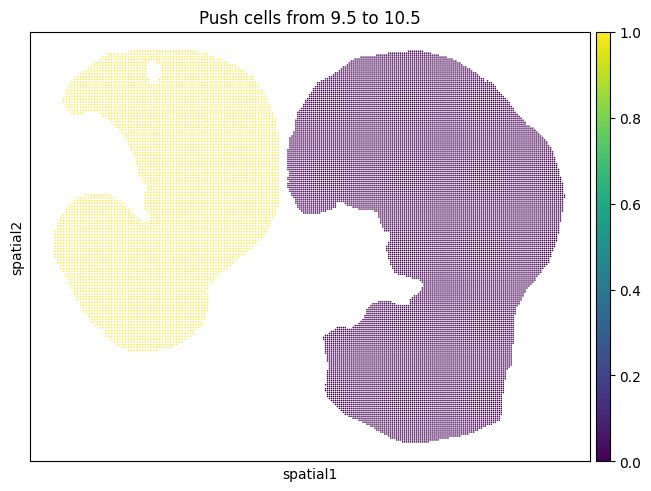

In [12]:
mtp.push(stp, basis="spatial")